In [1]:
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.nn.functional as F
import torch.backends.cudnn as cudnn



In [2]:

device = torch.device("cpu")
print(device)
to_pil = torchvision.transforms.ToPILImage()

cpu


NameError: name 'torchvision' is not defined

In [10]:
def load_data(n):
    X = []
    for i in range(n):
        try:
            img = Image.open(f"../images/screenshot_{i}.png")
        except:
            continue
        np_img = np.array(img)/255
        np_img = np.rollaxis(np_img, 2, 0)
        X.append(np_img)
    Y = np.load('../images/image_labels.npy')
    X = np.array(X)
    return X,Y

In [3]:
X,Y = load_data(n)
split = int(n-0.25*n)
Xt,Yt = X[:split,:,:,:],Y[:split,:,:]
Xv,Yv = X[split:,:,:,:],Y[split:,:,:]
Xt,Yt,Xv,Yv = torch.Tensor(Xt),torch.Tensor(Yt),torch.Tensor(Xv),torch.Tensor(Yv)
X.shape
Y.shape
data = torch.utils.data.TensorDataset(Xt, Yt)
validation = torch.utils.data.TensorDataset(Xv, Yv)
print(Xv.shape)
print(Yv.shape)

NameError: name 'load_data' is not defined

torch.Size([3, 3, 512, 512])
torch.Size([3, 512, 512])


torch.Size([3, 512, 512])
torch.Size([512, 512])


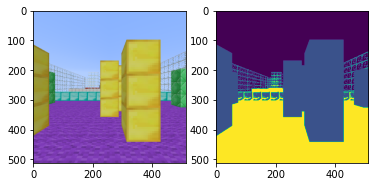

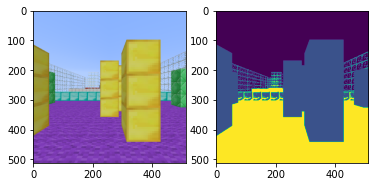

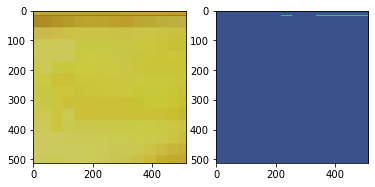

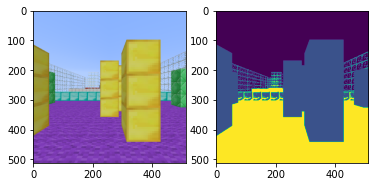

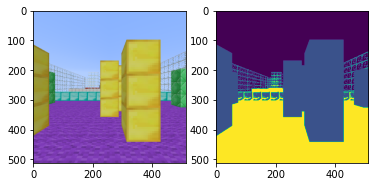

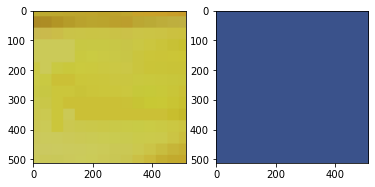

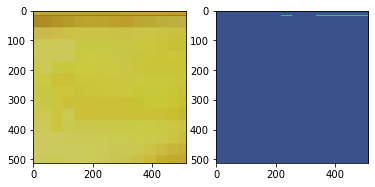

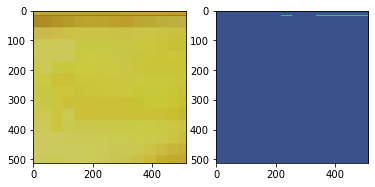

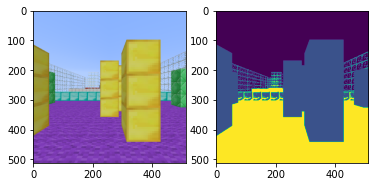

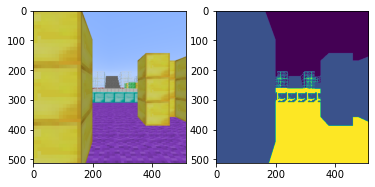

In [18]:
## NO NEED TO RUN THIS CELL IT JUST SHOWS U THE LABELS 
idx = np.random.choice(len(dataset), 10)
print(dataset[0][0].shape)
print(dataset[0][1].shape)
for i,j in enumerate(idx):
    _, axarr = plt.subplots(1, 2)
    img,label = dataset[j]
    temp = to_pil(img)
    axarr[0].imshow(temp)
    axarr[1].imshow(label, cmap='viridis',vmin=0, vmax=4)
    plt.savefig("plot"+str(i)+'.png')
    plt.show()


In [27]:
from torchvision.models.segmentation import segmentation
net = segmentation.deeplabv3_resnet50(num_classes=5).to(device)
net.train()
if cfg.pretrain:
    print("Weights Loaded")
    net.load_state_dict(torch.load("./saved_weights/vision_parameters.wts"))

In [ ]:
plt.plot(val_loss_list,label="loss")
plt.legend()
plt.savefig('loss.eps', format='eps')
plt.show()

In [ ]:
plt.plot(val_acc_list,label="acc")
plt.legend()
plt.savefig('acc.eps', format='eps')
plt.show()